# AVANCE 2 PROYECTO 

### Objetivo

 En este proyecto me encargare de limpiar los datos de la Base de Datos "Suicide Rates", que como ya lo he comentado anteriormente es de una BD que tiene informacion de Suicidios y contamos con algunas columnas las cuales las mas importantes para mi en parte son la generacion y el lugar donde han ocurrido estos mismos, ya que el objetivo principal es ver donde se presentan más estos casos y si la economia es el punto clave de ello. Tambien me interesa saber el sexo, años y darle continuidad a las preguntas planteadas que se tiene en cuestion de generaciones para que de esta manera me ayude a poder saber cual de estas Generaciones ha sido más propensa a esta triste situacion y poder tomar accion, creando conciencia a futuras generaciones y hacer todo lo que este en manos para tomarlo como "foco rojo" a esta misma y ayudar.
 
 Integrantes:
 
 * López Sánchez Maribel            1672709
 
Grupo: 001
 

### Preguntas de interes

* Quienes tienen mayor indice de suicidios por generaciones millenial y Z?
* Entre los paises de Mexico y Japón, quien tiene el mayor indice de suicidios?
* Se puede saber entre hombres y mujeres quienes tienen mayor indice de suicidios por generacion?
* Entre los paises de Mexico y Estados Unidos influyó en los suicidios la calidad de vida en base a la economia que se tenia?

# Limpieza de datos

El primer paso sera importar librerias y utilizamos la libreria pandas para poder cargar archivos csv.

In [65]:
import matplotlib as plt
import seaborn as sn
import seaborn as sns
import numpy as np 
import pandas as pd 
import json
import matplotlib.pyplot as plt

df = pd.read_csv("master_prueba.csv") 

Verificamos las dimensiones de la tabla

In [66]:
df.shape

(27820, 12)

A continuacion mostraremos los nombres y tipos de datos que tiene nuestra BD

In [67]:
df.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object

De estas columnas solamente necesitaremos country, sex, suicides_no, generation y gdp_per_capita. Ahora cambiaremos este nombre de las columnas al español

In [68]:
df = df.rename(columns = {'country':'Pais', 'sex':'Sexo', 'suicides_no':'NumeroDeSuicidios', 'generation':'Generacion', 'age': 'Edad'})
df.columns

Index(['Pais', 'year', 'Sexo', 'Edad', 'NumeroDeSuicidios', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'Generacion'],
      dtype='object')

Ahora, eliminaremos las filas que contengan datos nulos para quitar lo que no necesitamos. Nosotros lo hemos echo asi porque sabemos que las columnas de interes (PAIS, SEXO, NUMERO DE SUICIDIOS, GENERACION Y PRODUCTO INTERNO BRUTO (gdp_per_capita)) no se encuentran con ninguna celda vacia

In [69]:
df = df.dropna()

Para el siguiente paso eliminaremos todas las columnas que tengan datos nulos. Igual que en lo anterior, ya confirmamos que en nuestras columnas de interes no habia datos nulos.

In [70]:
df = df.dropna(axis=1)

Ahora mostraremos el resultado

In [71]:
df

,Pais,year,Sexo,Edad,NumeroDeSuicidios,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),Generacion
72,Albania,1995,male,25-34 years,13,232900,5.58,Albania1995,0.619,"2,424,499,009",835,X
73,Albania,1995,male,55-74 years,9,178000,5.06,Albania1995,0.619,"2,424,499,009",835,S
74,Albania,1995,female,75+ years,2,40800,4.90,Albania1995,0.619,"2,424,499,009",835,G.I.
75,Albania,1995,female,15-24 years,13,283500,4.59,Albania1995,0.619,"2,424,499,009",835,X
76,Albania,1995,male,15-24 years,11,241200,4.56,Albania1995,0.619,"2,424,499,009",835,X
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,S
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Z


A continuacion eliminaremos las columnas que no necesitamos. Para solo quedarnos con Pais, Sexo, NumeroDeSuicidios y Generacion y gdp_for_year que son de nuestro interes y en estas nos estaremos basando precisamente para contestar las preguntas de interes.

In [72]:
df_solopais = df.drop(['population', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'Edad'], axis=1)

In [73]:
df_solopais

,Pais,year,Sexo,NumeroDeSuicidios,suicides/100k pop,gdp_per_capita ($),Generacion
72,Albania,1995,male,13,5.58,835,X
73,Albania,1995,male,9,5.06,835,S
74,Albania,1995,female,2,4.90,835,G.I.
75,Albania,1995,female,13,4.59,835,X
76,Albania,1995,male,11,4.56,835,X
...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,107,2.96,2309,X
27816,Uzbekistan,2014,female,9,2.58,2309,S
27817,Uzbekistan,2014,male,60,2.17,2309,Z
27818,Uzbekistan,2014,female,44,1.67,2309,Z


# Visualización de Datos

A partir de aqui nos encargamos de agrupar los numereos de suicidios totales que se han tenido por todas las generaciones

In [74]:
df_solopaisgraph = df_solopais.groupby('Generacion').agg({'NumeroDeSuicidios':'sum'})

In [75]:
df_solopaisgraph

,NumeroDeSuicidios
Generacion,
BM,435081
G.I.,129523
M,242303
S,379755
X,529371
Z,7991


En base a la pregunta: 
*  Quienes tienen mayor indice de suicidios por generaciones millenial y Z?
Se puede dar a conocer lo siguiente, clasificando los suicidios por generación como se puede ver en la tabla de arriba y en la grafica de abajo que entre más joven es menos propenso a que se cometa un suicidio, en este caso la generacion Z da la razon. Los números en la grafica y tablas proporcionadas hablan por si solas, ya que a partir de que nosotros formulamos la pregunta en cuestion, para la generacion Z y Millenial nos dimos cuenta que precisamente quien tiene un mayor indice de suicidios es la Generacion de los Millenial y nos ayuda a nosotros a poder recopilar mejor la informacion de esta manera, ya que es mas factible, consisa y tangible.

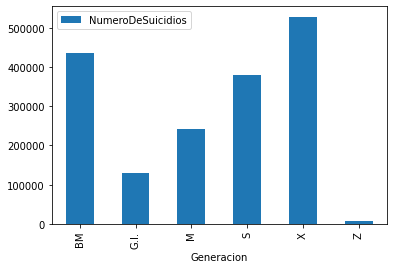

In [76]:
df_solopaisgraph.plot.bar(stacked=True)

In [77]:
df_genXpais = df_solopais.groupby(['Generacion', 'Pais']).agg({'NumeroDeSuicidios':'sum'})
df_genXpais

NumeroDeSuicidios
Generacion Pais                                   
BM         Albania                              31
           Antigua and Barbuda                   0
           Argentina                          4668
           Armenia                             146
           Australia                          4433
...                                            ...
Z          United Arab Emirates                  0
           United Kingdom                       50
           United States                      1695
           Uruguay                              16
           Uzbekistan                          430

[525 rows x 1 columns]

En base a la pregunta:
* Entre los paises de Mexico y Japón, quien tiene el mayor indice de suicidios?
Se obtiene la siguiente tabla, con lo cual la estadistica nos permite observar los diferentes indices de suicidios en cada pais, pero en la grafica de abajo nos permite observar que el pais de Japon tiene el mayor indice de suicidios, sin embargo lo que nos muestra la grafica no es solamente eso ya que Japon tiene el segundo lugar de los primeros 10 paises, el primer lugar lo tiene Estados Unidos.

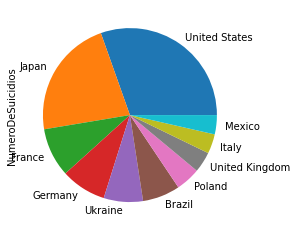

In [78]:
df_solopais.groupby(['Pais']).NumeroDeSuicidios.sum().nlargest(10).plot(kind='pie')  

En base a la pregunta: 
* Se puede saber entre hombres y mujeres quienes tienen mayor indice de suicidios por generacion? En base a las clases creadas para mostrar la totalidad de numero de suicidios por parte de Mujeres y Hombres, el resultado mayor fue por parte de los Hombres con una diferencia de 902,024. Mostrando el resultado en las siguientes graficas

In [79]:
clase1 = df[df['Sexo'] == 'female']
clase1 = clase1.agg({'NumeroDeSuicidios':'sum'})

In [80]:
clase1

NumeroDeSuicidios    411000
dtype: int64

In [81]:
clase2 = df[df['Sexo'] == 'male']
clase2 = clase2.agg({'NumeroDeSuicidios':'sum'})

In [82]:
clase2

NumeroDeSuicidios    1313024
dtype: int64

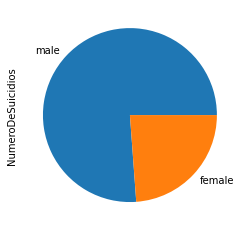

In [83]:
df_solopais.groupby(['Sexo']).NumeroDeSuicidios.sum().nlargest(10).plot(kind='pie')  

A continuacion convertimos a M y F los datos de Male y Female, para poder tomar con mayor practicidad los datos de la tabla que crearemos para poder saber con exactitud cuantos suicidios de Hombres y Mujeres se tuvieron en cada Generacion, ya que nos ayudara a contestar la tercera pregunta.

In [84]:
Sexo = {"male" : "M", "female" : "F"}
df["Sexo"] = df["Sexo"].apply(lambda x:Sexo[x])
df["Sexo"].head()

72    M
73    M
74    F
75    F
76    M
Name: Sexo, dtype: object

In [85]:
df.Sexo

72       M
73       M
74       F
75       F
76       M
        ..
27815    F
27816    F
27817    M
27818    F
27819    F
Name: Sexo, Length: 8364, dtype: object

In [86]:
pclass= df.groupby(["Generacion", "Sexo"])["NumeroDeSuicidios"].sum()
pclass

Generacion  Sexo
BM          F        98794
            M       336287
G.I.        F        42572
            M        86951
M           F        52740
            M       189563
S           F        98919
            M       280836
X           F       114868
            M       414503
Z           F         3107
            M         4884
Name: NumeroDeSuicidios, dtype: int64

En cuestion de la pregunta:
* Se puede saber entre hombres y mujeres quienes tienen mayor indice de suicidios por generacion? Podemos apreciar en la siguiente grafica los resultados obtenidos de hombres por cada generacion, teniendo en nuestra "Y" los Numeros de Suicidios, en nuestra "X" la Generacion a quien corresponde y como segunda grafica los datos obtenidos de mujeres por cada generacion. Confirmando que la mayoria de suicidios corresponden a los Hombres y es en la Generacion X donde más indices hubo, pero no solamente eso, sino que en segundo lugar tenemos a la generacion de los Boomers, igualmente con mayor indice de Hombres y esto nos confirma a nosotros que precisamente en esta generacion como todos sabemos fue la que paso por muchas crisis, perdieron su empleo, sus casas y parte de su jubilacion.

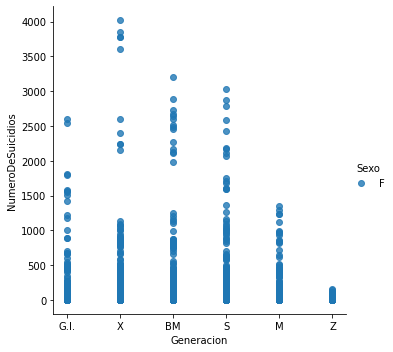

In [87]:
sns.lmplot(x='Generacion', y='NumeroDeSuicidios', hue='Sexo', 
           data=df.loc[df['Sexo'].isin(['F'])], 
           fit_reg=False)

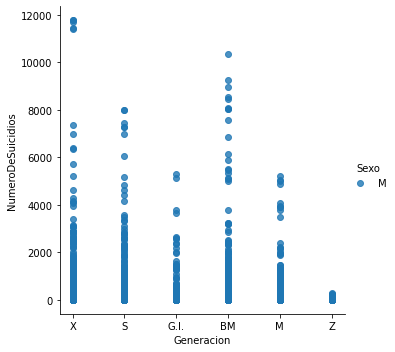

In [88]:
sns.lmplot(x='Generacion', y='NumeroDeSuicidios', hue='Sexo', 
           data=df.loc[df['Sexo'].isin(['M'])], 
           fit_reg=False)

# Economia

En base a los datos documentales analizados, para la cuarta pregunta, referente a:
* Entre los paises de Mexico y Estados Unidos influyó en los suicidios la calidad de vida en base a la economia que se tenia? Tomare en cuenta las siguientes graficas para saber la relacion que se tienen entre los datos correspondientes y de esta manera dar a conocer en base a los resultados si en verdad influyo o no. 

En primer punto, mostrare el numero de suicidios totales que se han tenido por el rango de edad para saber si influye dentro de la economia, ¿A que quiero llegar?.Al punto de saber si en cuestion de edades laborales, mayores de 18 por parte de mexico y mayores de 21 años por parte de EU, han sido la mayoria de los suicidios.

In [89]:
suicides_gdp_country= df.groupby(["Pais", "year","gdp_per_capita ($)"])["NumeroDeSuicidios"].sum()
suicides_gdp_country

Pais                 year  gdp_per_capita ($)
Albania              1995  835                     88
                     2000  1299                    54
                     2005  2931                     0
                     2010  4359                    96
Antigua and Barbuda  2012  13657                    0
                                                 ... 
Uzbekistan           2010  1533                  1464
                     2011  1767                  1640
                     2012  1964                  1835
                     2013  2150                  1950
                     2014  2309                  2095
Name: NumeroDeSuicidios, Length: 697, dtype: int64

In [90]:
%%HTML
<div class='tableauPlaceholder' id='viz1561735467494' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Su&#47;Suicide_ratio_Dashboard&#47;SuicidebyCountry&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Suicide_ratio_Dashboard&#47;SuicidebyCountry' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Su&#47;Suicide_ratio_Dashboard&#47;SuicidebyCountry&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1561735467494');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='800px';vizElement.style.height='827px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

Podemos ver que en México precisamente la mayoria de los suicidios han sido mayores de los 18 años, a partir de esa edad es cuando más se han dado desgraciadamente. Y por Parte de Estados Unidos se comienzan la mayoria de los suicidios entre los 35 y 54 años, edades en las cuales es muy significativo ya que podria ser que se debe a la gran responsabilidad de cargar con una familia. 

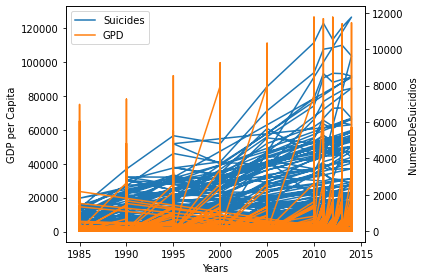

In [99]:
fig, ax1 = plt.subplots()

# Plot the suicides over the years.
lns1 = ax1.plot(df['year'], df['gdp_per_capita ($)'], 'C0', label='Suicides')

# Create a shared axis for plotting on a different scale the GPD.
ax2 = ax1.twinx()
lns2 = ax2.plot(df['year'], df['NumeroDeSuicidios'], 'C1', label='GPD')

# Join both legends into the same box.
lns = lns1 + lns2
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=2)

# Set the labels.
ax1.set_ylabel('GDP per Capita')
ax2.set_ylabel('NumeroDeSuicidios')
ax1.set_xlabel('Years')

plt.tight_layout()
plt.show()

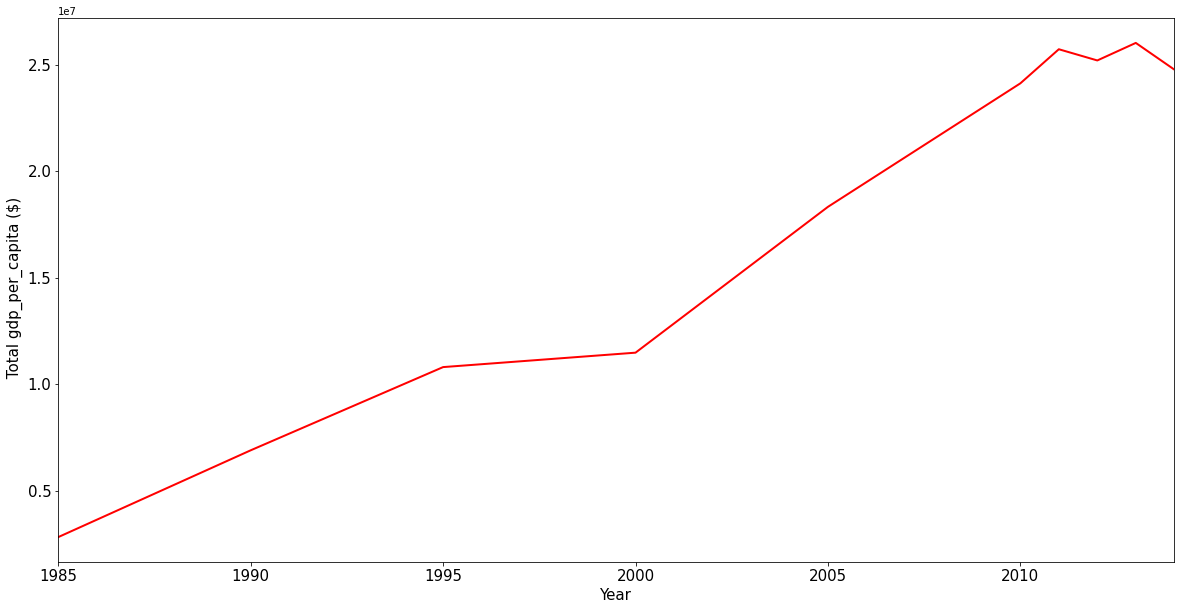

In [111]:
data_gdp = (df['gdp_per_capita ($)'].groupby(df.year)).sum()
data_gdp.plot(figsize=(20,10), linewidth=2, fontsize=15,color='red')
plt.xlabel('Year', fontsize=15)
plt.ylabel(' Total gdp_per_capita ($)',fontsize=15)
plt.show()

In [117]:
suicides_poor_rich = df[['year', 'Pais', 'gdp_per_capita ($)', 'NumeroDeSuicidios']]

# Sort the the countries by their average gpd over the years.
# Then get the list of the countries ordered.
countries_by_gpd = suicides_poor_rich.groupby('Pais').mean().sort_values('gdp_per_capita ($)', ascending=False).index

In [118]:
top_countries = countries_by_gpd[:5]
bot_countries = countries_by_gpd[-5:]

# Append them for the future filter.
countries_to_compare = top_countries.append(bot_countries)
countries_to_compare

Index(['Luxembourg', 'Norway', 'Qatar', 'Switzerland', 'Singapore',
       'Nicaragua', 'Uzbekistan', 'Kyrgyzstan', 'Sri Lanka', 'Azerbaijan'],
      dtype='object', name='Pais')

In [121]:
suicides_poor_rich = suicides_poor_rich.loc[suicides_poor_rich['Pais'].isin(countries_to_compare)]
suicides_poor_rich.sample(5)

,year,Pais,gdp_per_capita ($),NumeroDeSuicidios
20060,1995,Qatar,17559,0
18159,2010,Norway,93638,132
14724,2010,Kyrgyzstan,991,86
27767,2010,Uzbekistan,1533,101
20093,2005,Qatar,55899,0


In [122]:
country_filter = {country:'TOP' for country in top_countries}
country_filter.update({country:'BOT' for country in bot_countries})

country_filter

{'Luxembourg': 'TOP',
 'Norway': 'TOP',
 'Qatar': 'TOP',
 'Switzerland': 'TOP',
 'Singapore': 'TOP',
 'Nicaragua': 'BOT',
 'Uzbekistan': 'BOT',
 'Kyrgyzstan': 'BOT',
 'Sri Lanka': 'BOT',
 'Azerbaijan': 'BOT'}

In [123]:
suicides_poor_rich['Pais'] = suicides_poor_rich['Pais'].map(country_filter)
suicides_poor_rich.sample(5)

C:\Users\marib\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,year,Pais,gdp_per_capita ($),NumeroDeSuicidios
18047,2000,TOP,41099,0
27686,2000,BOT,632,57
20191,2013,TOP,93066,0
22748,2014,TOP,84442,29
18042,2000,TOP,41099,50


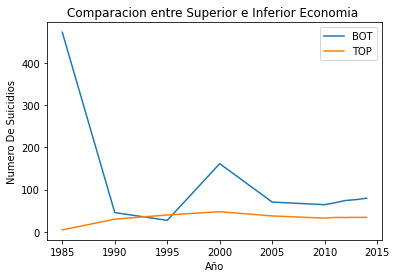

In [127]:
sns.lineplot(x='year', y='NumeroDeSuicidios', data=suicides_poor_rich, hue='Pais', ci=None)
plt.legend(labels=['BOT', 'TOP'])

plt.title('Comparacion entre Superior e Inferior Economia ')
plt.xlabel('Año')
plt.ylabel('Numero De Suicidios')
plt.show()

We expect the suicide rate to be negatively correlated to gdp per capita since people seem to care about money. While gdp does not perfectly reflect the wealth of the average person, it's what we got. Let's see if this checks out.
Males commit suicide significantly higher than females, with and average difference of 15 suicides per 100k of population. Interestingly this difference becomes greater at older ages.
Como podemos ver, los países más pobres llegaron incluso por debajo de los países más ricos durante casi dos décadas. Eso puede deberse al hecho de que la esperanza de vida es menor en esos países y, como vimos antes, la gran parte del total de suicidios se comete en las últimas etapas de la vida.

In [ ]:
df %>% group_by(country, gdppc) %>% summarize(s = sum(suicides_no)/sum(population)) %>% 
ggplot() + geom_point(aes(gdppc, s), alpha=0.4)

### Conclusion

Ante este proyecto se han aprendido nuevas maneras del uso del notebook, desde limpieza de datos como su visualizacion para poder representar a los demas y dar informacion util ante cualquier situacion referente a los indices de suicidios en diferentes paises, respecto a las preguntas formuladas las conclusiones se fueron guiando durante todo el proyecto, pero recopilando la informacion, llegamos a estas.
Las preguntas fueron totalmente respondidas, en cuestion de la primera:
*  Quienes tienen mayor indice de suicidios por generaciones millenial y Z?
Pudimos concluir que el grupo más propenso al suicidio fueron las generaciones más jovenes, tal como lo es la Z, demostradas estas estadisticas en nuestra primera grafica anteriormente mostrada, pero sin embargo no solo mostraron eso, sino que el primer lugar de suicidios lo tiene la generacion X, sorprendentemente.

Para la segunda pregunta que costa de: 

* Entre los paises de Mexico y Japón, quien tiene el mayor indice de suicidios?
Desgraciadamente el pais que conforma el numero uno en indice de suicidios es el de Japon (en esta comparacion) pero al mostrar la tabla con todos los paises se demostro que el primero de los primeros diez lo toma Estados Unidos.

Para la tercera pregunta:

* Se puede saber entre hombres y mujeres quienes tienen mayor indice de suicidios por generacion?
Si, como ya lo habiamos mencionado se dio a conocer en dos tablas por separado para una mejor visualizacion de datos que los hombres eran quien tenian mayor indice de suicidios, pero de esta manera pudimos darnos cuenta que quienes más hombres tenian en suicidios fue en la generacion X, todo esto comprobado y mostrado en la grafica.
